In [2]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# using pandas reading csv file and store it in a dataframe

path = r"C:\Users\nvish\Downloads\CocoaPrice.csv"

df = pd.read_csv(path)
df

,Date,Price
0,1994-10-01,1447.95
1,1994-11-01,1437.05
2,1994-12-01,1399.43
3,1995-01-01,1468.86
4,1995-02-01,1510.55
...,...,...
349,2023-11-01,3799.15
350,2023-12-01,3897.04
351,2024-01-01,4087.54
352,2024-02-01,5226.12


# Data pre-processing

In [4]:
#  

df.shape

(354, 2)

In [5]:
# information of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    354 non-null    object 
 1   Price   354 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


In [6]:
# converting date into datetime format using pandas

df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Price
Date,
1994-10-01,1447.95
1994-11-01,1437.05
1994-12-01,1399.43
1995-01-01,1468.86
1995-02-01,1510.55
...,...
2023-11-01,3799.15
2023-12-01,3897.04
2024-01-01,4087.54


In [7]:
# information of columns after converting the Date column to datatime type

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 354 entries, 1994-10-01 to 2024-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   354 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [10]:
# overall description of columns

df.describe(include='all')

,Price
count,354.000000
mean,1853.000311
std,623.238555
min,874.140000
25%,1396.147500
50%,1805.985000
75%,2168.545000
max,6510.160000


In [30]:
# checking for null values

df.isna().sum()

Price    0
dtype: int64

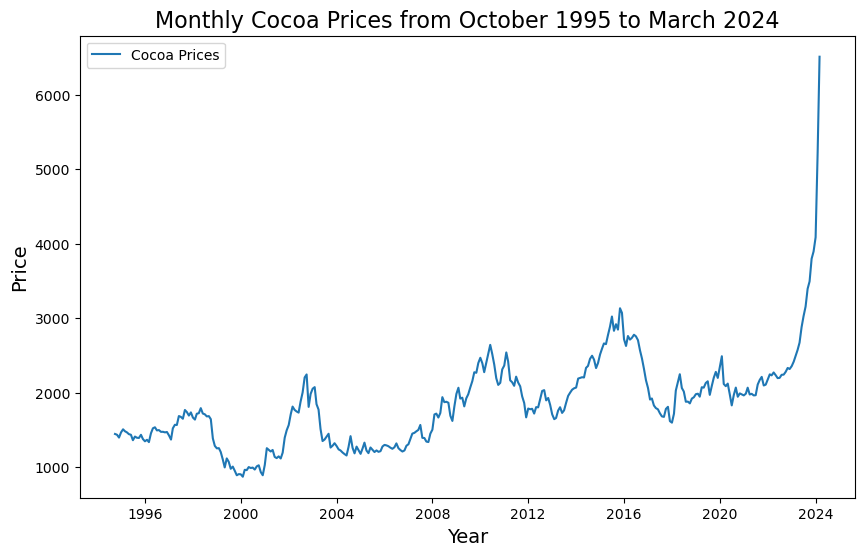

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Cocoa Prices')
plt.title('Monthly Cocoa Prices from October 1995 to March 2024', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show()

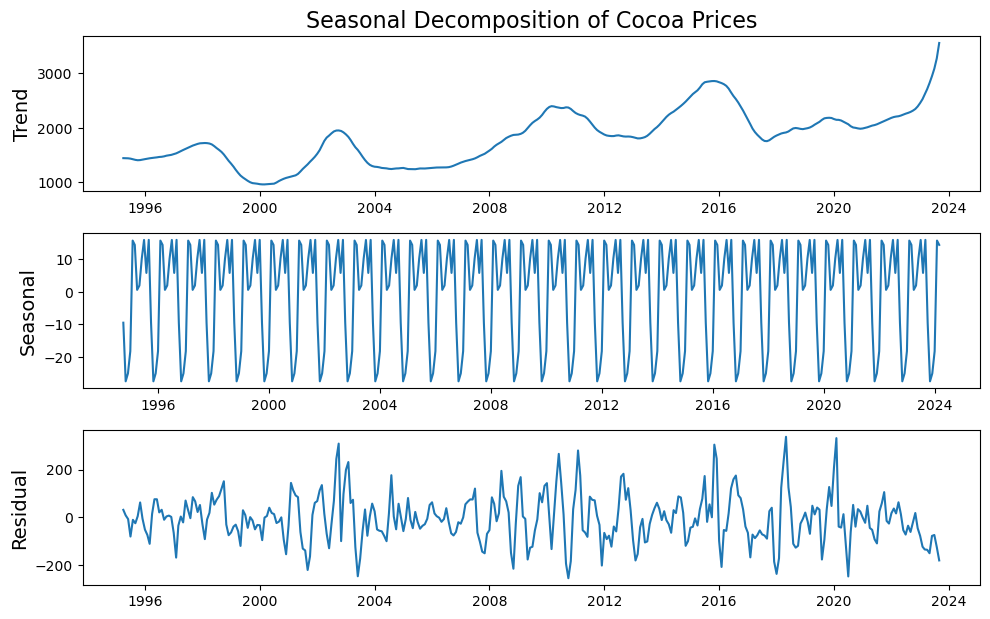

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Price'], model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 8))

plt.subplot(412)
plt.plot(result.trend)
plt.ylabel('Trend', fontsize=14)
plt.title('Seasonal Decomposition of Cocoa Prices', fontsize = 16)

plt.subplot(413)
plt.plot(result.seasonal)
plt.ylabel('Seasonal', fontsize=14)

plt.subplot(414)
plt.plot(result.resid)
plt.ylabel('Residual', fontsize=14)

plt.tight_layout()
plt.show()


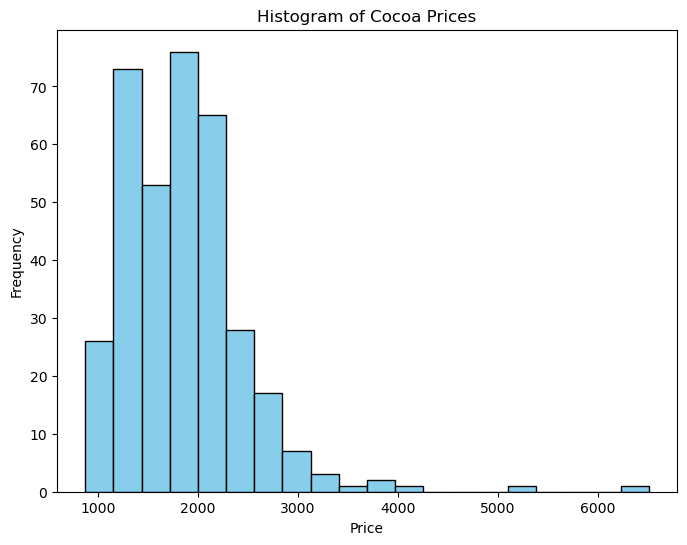

In [33]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Cocoa Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

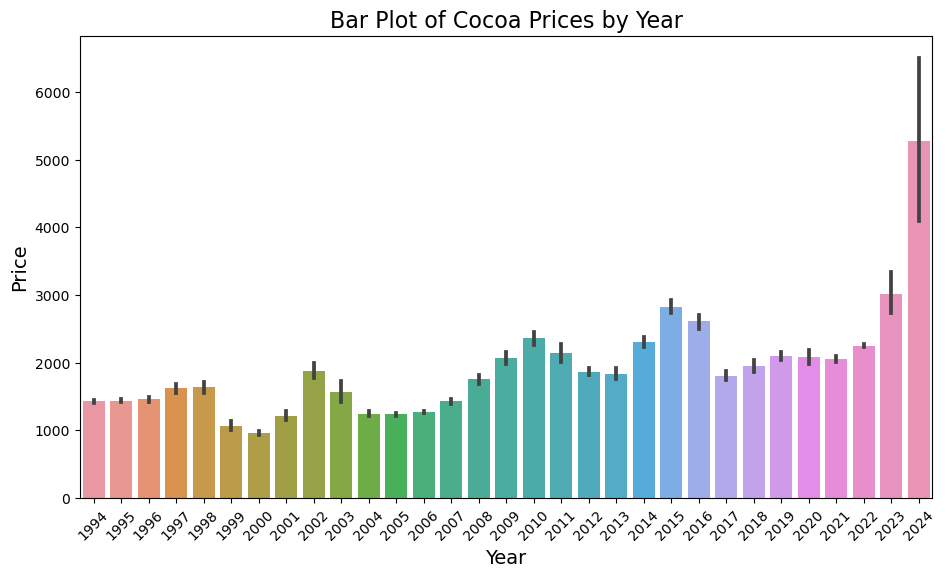

In [34]:
# Assuming 'Date' column is already in datetime format
# Extract year and month from the 'Date' column
df['Year'] = df.index.year

# Create box plots by year
plt.figure(figsize=(11, 6))
sns.barplot(x=df['Year'], y=df['Price'])
plt.title('Bar Plot of Cocoa Prices by Year', fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

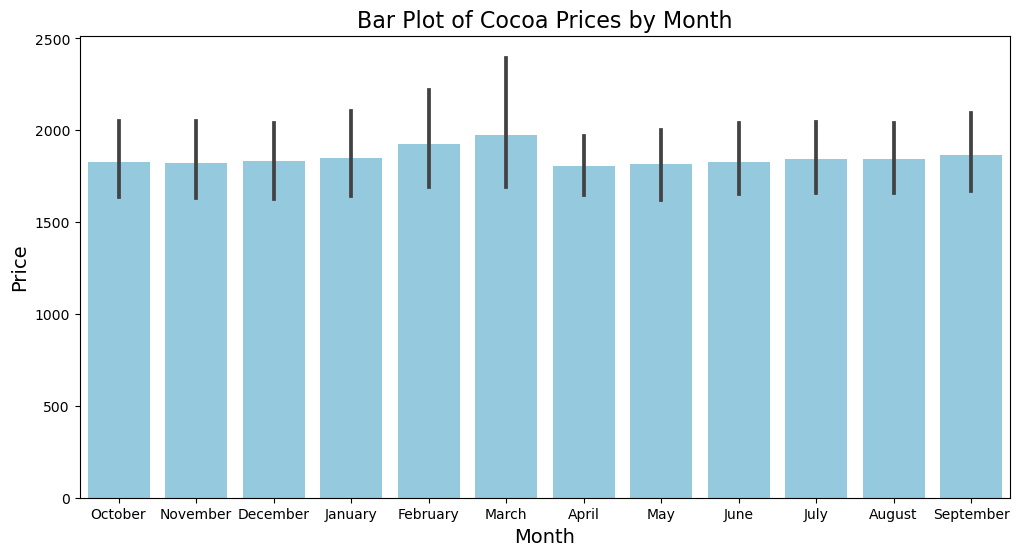

In [35]:
df['Month'] = df.index.month_name()

plt.figure(figsize=(12, 6))
sns.barplot(x=df['Month'], y=df['Price'],color = 'skyblue')
plt.title('Bar Plot of Cocoa Prices by Month',fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

# Simple Time Series

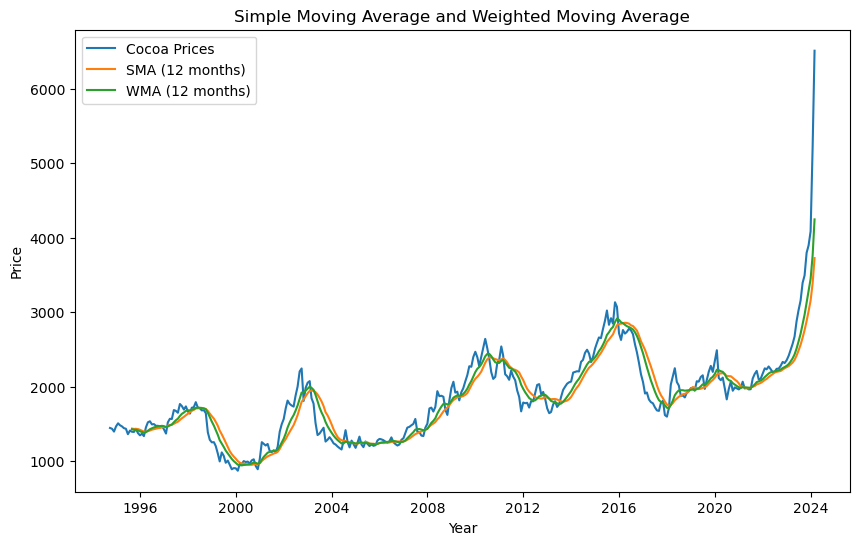

In [13]:
# Simple Moving Average (SMA)
def simple_moving_average(df, window):
    return df.rolling(window=window).mean()

# Weighted Moving Average (WMA)
def weighted_moving_average(df, window, weights):
    return df.rolling(window=window).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

# Plot SMA and WMA
window_sma = 12  # Monthly moving average over 1 year
weights = np.arange(1, window_sma + 1)

df['SMA'] = simple_moving_average(df['Price'], window_sma)
df['WMA'] = weighted_moving_average(df['Price'], window_sma, weights)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Cocoa Prices')
plt.plot(df.index, df['SMA'], label=f'SMA ({window_sma} months)')
plt.plot(df.index, df['WMA'], label=f'WMA ({window_sma} months)')
plt.title('Simple Moving Average and Weighted Moving Average')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, RMSE, and MSE for Simple Moving Average (SMA)
mae_sma = mean_absolute_error(df['Price'][window_sma:], df['SMA'][window_sma:])
rmse_sma = mean_squared_error(df['Price'][window_sma:], df['SMA'][window_sma:], squared=False)
mse_sma = mean_squared_error(df['Price'][window_sma:], df['SMA'][window_sma:])

# Calculate MAE, RMSE, and MSE for Weighted Moving Average (WMA)
mae_wma = mean_absolute_error(df['Price'][window_sma:], df['WMA'][window_sma:])
rmse_wma = mean_squared_error(df['Price'][window_sma:], df['WMA'][window_sma:], squared=False)
mse_wma = mean_squared_error(df['Price'][window_sma:], df['WMA'][window_sma:])

print("Metrics for Simple Moving Average (SMA):")
print("MAE:", mae_sma)
print("RMSE:", rmse_sma)
print("MSE:", mse_sma)

print("\nMetrics for Weighted Moving Average (WMA):")
print("MAE:", mae_wma)
print("RMSE:", rmse_wma)
print("MSE:", mse_wma)


Metrics for Simple Moving Average (SMA):
MAE: 180.18494639376217
RMSE: 289.8563203974798
MSE: 84016.68647436648

Metrics for Weighted Moving Average (WMA):
MAE: 135.55885252661565
RMSE: 222.88515088810465
MSE: 49677.79048641317


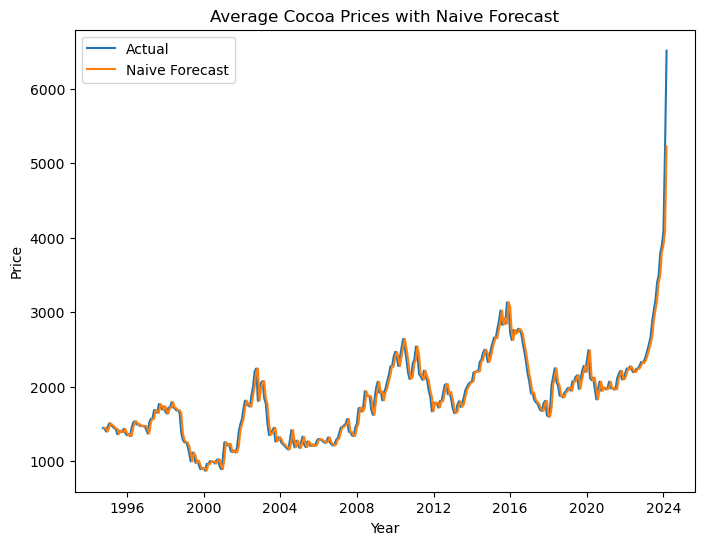

In [93]:
# Shift the data by one period to get the Naive forecast
naive_forecast = df['Price'].shift(1)

# Plot the original data and Naive forecast
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['Price'], label='Actual')
plt.plot(naive_forecast, label='Naive Forecast')
plt.title('Average Cocoa Prices with Naive Forecast')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values for the forecast period
actual_values = df['Price'].iloc[1:]

# Extract the forecasted values for the same period
naive_forecast_period = naive_forecast.iloc[1:]

# Calculate MAE, MSE and RMSE
naive_mae = mean_absolute_error(actual_values, naive_forecast_period)
naive_mse = mean_squared_error(actual_values, naive_forecast_period)
naive_rmse = np.sqrt(naive_mse)

# Print the results
print("Naive Method:")
print("MAE:", naive_mae)
print("MSE:", naive_mse)
print("RMSE:", naive_rmse)


Naive Method:
MAE: 81.46195467422098
MSE: 18374.45655552408
RMSE: 135.55241257729085


# Smoothing

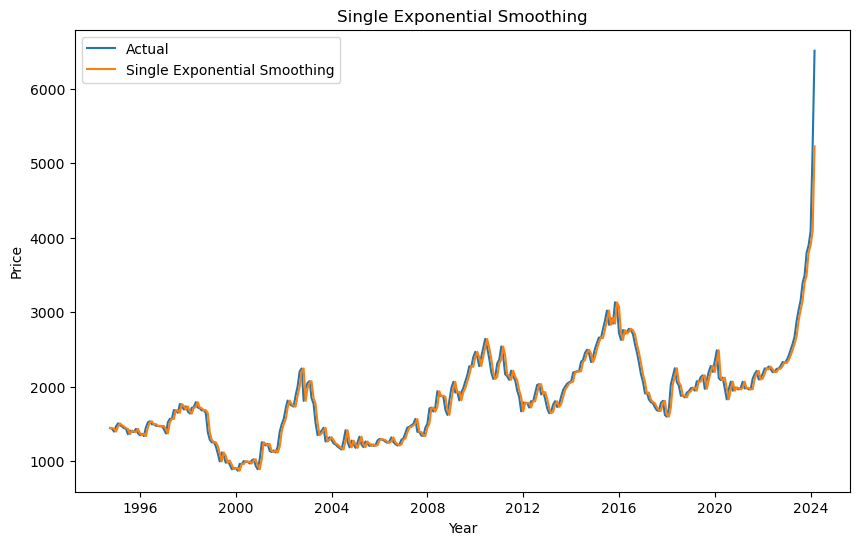

In [81]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Single Exponential Smoothing (SES)
model_ses = SimpleExpSmoothing(df['Price']).fit()
df['SES'] = model_ses.forecast(steps=6)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual')
plt.plot(model_ses.fittedvalues, label='Single Exponential Smoothing')
plt.title('Single Exponential Smoothing')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


In [84]:
# Extract the last 6 actual prices
actual_prices = df['Price'][-6:]

# Extract the last 6 forecasted values
forecasted_values = model_ses.forecast(steps=6)

# Calculate MAE, RMSE, and MSE for Single Exponential Smoothing (SES)
mae_ses = mean_absolute_error(actual_prices, forecasted_values)
rmse_ses = mean_squared_error(actual_prices, forecasted_values, squared=False)
mse_ses = mean_squared_error(actual_prices, forecasted_values)

print("Metrics for Single Exponential Smoothing (SES):")
print("MAE:", mae_ses)
print("RMSE:", rmse_ses)
print("MSE:", mse_ses)

Metrics for Single Exponential Smoothing (SES):
MAE: 2007.653320577542
RMSE: 2265.201469937214
MSE: 5131137.699405714


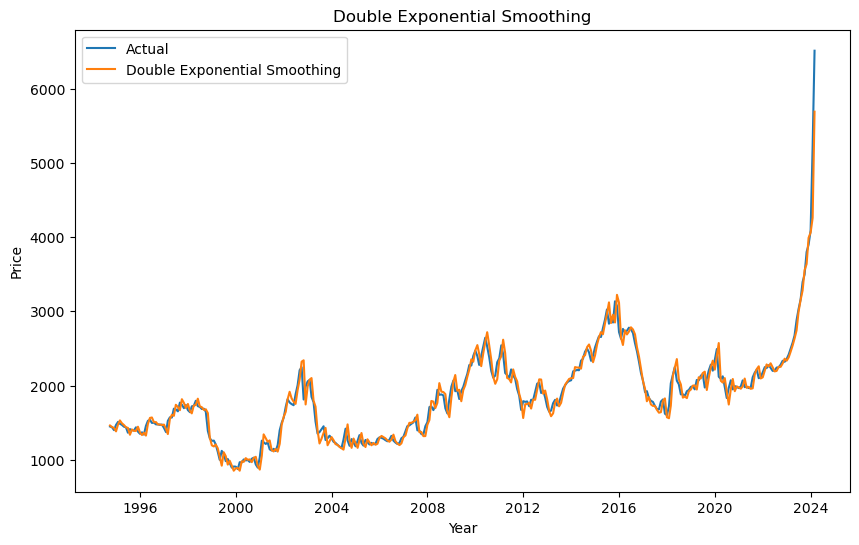

In [85]:
# Double Exponential Smoothing (DES)
model_des = ExponentialSmoothing(df['Price'], trend='add').fit()
df['DES'] = model_des.forecast(steps=6)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Actual')
plt.plot(model_des.fittedvalues, label='Double Exponential Smoothing')
plt.title('Double Exponential Smoothing')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [88]:
# Extract the last 6 actual prices
actual_prices = df['Price'][-6:]

# Extract the last 6 forecasted values
forecasted_values = model_des.forecast(steps=6)

# Calculate MAE, RMSE, and MSE for Double Exponential Smoothing (DES)
mae_des = mean_absolute_error(actual_prices, forecasted_values)
rmse_des = mean_squared_error(actual_prices, forecasted_values, squared=False)
mse_des = mean_squared_error(actual_prices, forecasted_values)

print("Metrics for Double Exponential Smoothing (DES):")
print("MAE:", mae_des)
print("RMSE:", rmse_des)
print("MSE:", mse_des)


Metrics for Double Exponential Smoothing (DES):
MAE: 4521.182084728901
RMSE: 4550.524227697948
MSE: 20707270.746866006


# ARIMA

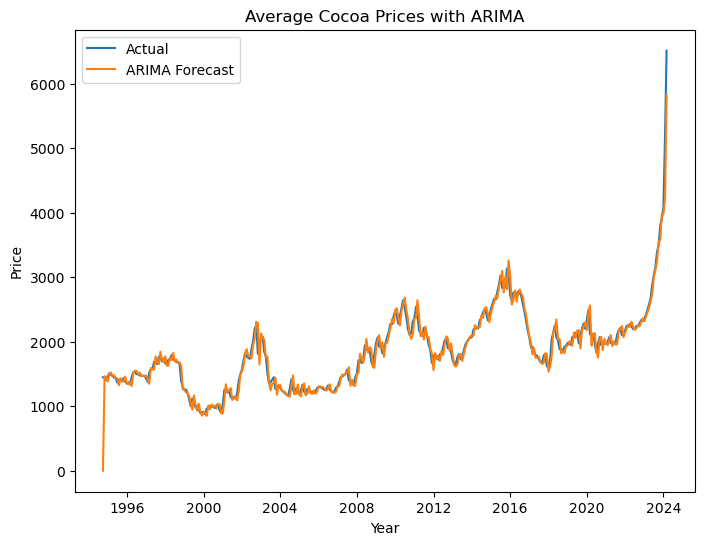

In [89]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_arima = ARIMA(df['Price'], order=(5,1,0)).fit()
df['ARIMA'] = model_arima.forecast(steps=6)

plt.figure(figsize=(8,6))
plt.plot(df['Price'], label='Actual')
plt.plot(model_arima.fittedvalues, label='ARIMA Forecast')
plt.title('Average Cocoa Prices with ARIMA')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


In [90]:
# Extract the last 6 actual prices
actual_prices = df['Price'][-6:]

# Extract the last 6 forecasted values
forecasted_values = model_arima.forecast(steps=6)

# Calculate MAE, RMSE, and MSE for ARIMA
mae_arima = mean_absolute_error(actual_prices, forecasted_values)
rmse_arima = mean_squared_error(actual_prices, forecasted_values, squared=False)
mse_arima = mean_squared_error(actual_prices, forecasted_values)

print("Metrics for ARIMA:")
print("MAE:", mae_arima)
print("RMSE:", rmse_arima)
print("MSE:", mse_arima)


Metrics for ARIMA:
MAE: 3641.4577089028207
RMSE: 3681.7953549422805
MSE: 13555617.035674552


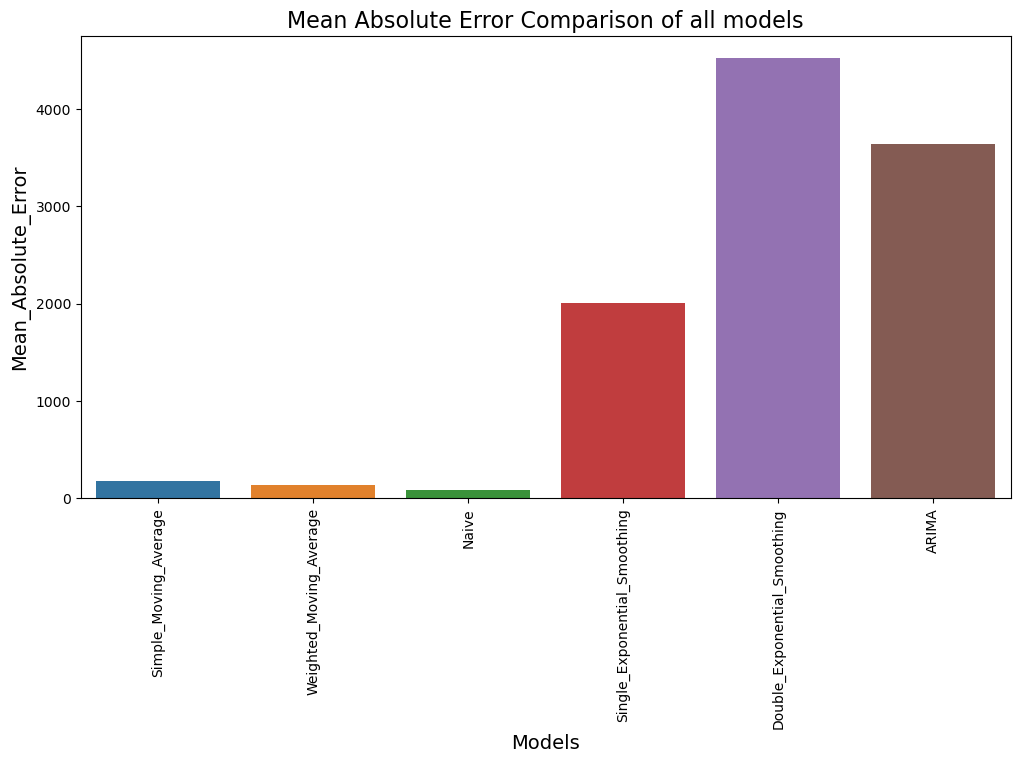

In [103]:
Models = ['Simple_Moving_Average', 'Weighted_Moving_Average','Naive','Single_Exponential_Smoothing','Double_Exponential_Smoothing','ARIMA']

MAE = [mae_sma,mae_wma,naive_mae,mae_ses,mae_des,mae_arima]

plt.figure(figsize=(12, 6))
sns.barplot(x=Models, y=MAE)
plt.title('Mean Absolute Error Comparison of all models',fontsize=16)
plt.xlabel('Models',fontsize=14)
plt.ylabel('Mean_Absolute_Error',fontsize=14)
plt.xticks(rotation=90)
plt.show()